# Pizza Place Sales Analysis

## In this project, we have gathered the dataset from the Maven Analytics website - https://mavenanalytics.io/challenges/maven-pizza-challenge/4

## The dataset contains year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

# Importing necessary libraries that are required.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset which is in csv format.

In [2]:
df = pd.read_csv('pizza_sales.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Data Cleaning

### 1. Checking for null values in the datset.

In [4]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

### 2. Checking for duplicated values in the dataset.

In [5]:
df.duplicated().sum()

0

# KPIs Requirement

## Total Revenue - 

In [6]:
# Total Revenue
#The sum of total price of all pizza orders.

df['total_price'].sum()

817860.05

## Average Order Value -

In [7]:
# Average Order Value - 
# The average amount spent per order, calculated by dividing the total revenue by total number of orders.
# Total Revenue/Total Number of Orders

(df['total_price'].sum()) / (df['order_id'].nunique())

38.30726229508197

## Total Pizzas Sold -

In [8]:
# Total Pizzas Sold
# Sum of the quantity of all pizzas sold

df['quantity'].sum()

49574

## Total Orders - 

In [9]:
# Total Orders
# Count of all the distinct order id

df['order_id'].nunique()

21350

## Average Pizzas Per Order  - 

In [10]:
# The average number of pizzas sold per order
# Calculated by dividing the total number of pizzas sold by the total number of orders.

(df['quantity'].sum()) / (df['order_id'].nunique())

2.321967213114754

# Charts Requirement

## Daily Trend for Total Orders - 

In [11]:
# Create a chart depicting sales distribution from Monday to Sunday.

In [12]:
# First create a day column derived from order_date column.

df['order_date'].dtype

dtype('O')

In [13]:
# Convert order_date column to datetime format.
# NOTE - We are writing dayfirst = True because compiler is having problem understanding whether the first number in date is month or day number,
# so we are telling it that first number is day.

df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

In [14]:
df['order_date'].dtype

dtype('<M8[ns]')

In [15]:
# Now make a new column of day name from date column.

df['day_name']=df['order_date'].dt.day_name()

In [16]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday


In [17]:
# Total Orders by Day
# And then sorting them by highest orders

df.groupby('day_name')['order_id'].nunique().sort_values(ascending = False)

day_name
Friday       3538
Thursday     3239
Saturday     3158
Wednesday    3024
Tuesday      2973
Monday       2794
Sunday       2624
Name: order_id, dtype: int64

In [18]:
# In order to plot this data we will create a new small dataframe and name it a.
# By default nunique() return result as pandas.series and we cannot plot it.
# So we will convert to a pandas.dataframe by using reset_index().

a = df.groupby('day_name')['order_id'].nunique().reset_index()

In [19]:
a

,day_name,order_id
0,Friday,3538
1,Monday,2794
2,Saturday,3158
3,Sunday,2624
4,Thursday,3239
5,Tuesday,2973
6,Wednesday,3024


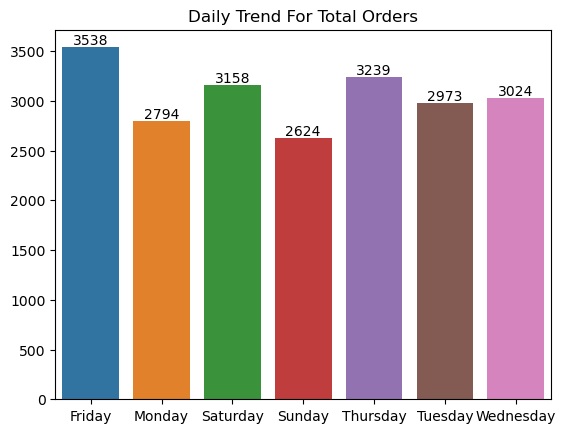

In [20]:
# Now we will represent this graphically.
# Daily Trend For Total Orders.

ax=sns.barplot(x=a['day_name'],y=a['order_id'], data =a)
plt.title('Daily Trend For Total Orders')
ax.bar_label(ax.containers[0], fmt='%g')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

## Monthly Trend For Total Orders - 

In [21]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday


In [22]:
# First we will extract month column from date column.
# We can use dt.month_name() function to extract month from date.

df['month_name']=df['order_date'].dt.month_name()

In [23]:
# Total Orders By Month 

df.groupby('month_name')['order_id'].nunique()

month_name
April        1799
August       1841
December     1680
February     1685
January      1845
July         1935
June         1773
March        1840
May          1853
November     1792
October      1646
September    1661
Name: order_id, dtype: int64

In [24]:
# Now we will plot this graphically.
# For that we will put the above data in a dataframe.

b=df.groupby('month_name')['order_id'].nunique().reset_index()

In [25]:
b

,month_name,order_id
0,April,1799
1,August,1841
2,December,1680
3,February,1685
4,January,1845
5,July,1935
6,June,1773
7,March,1840
8,May,1853
9,November,1792


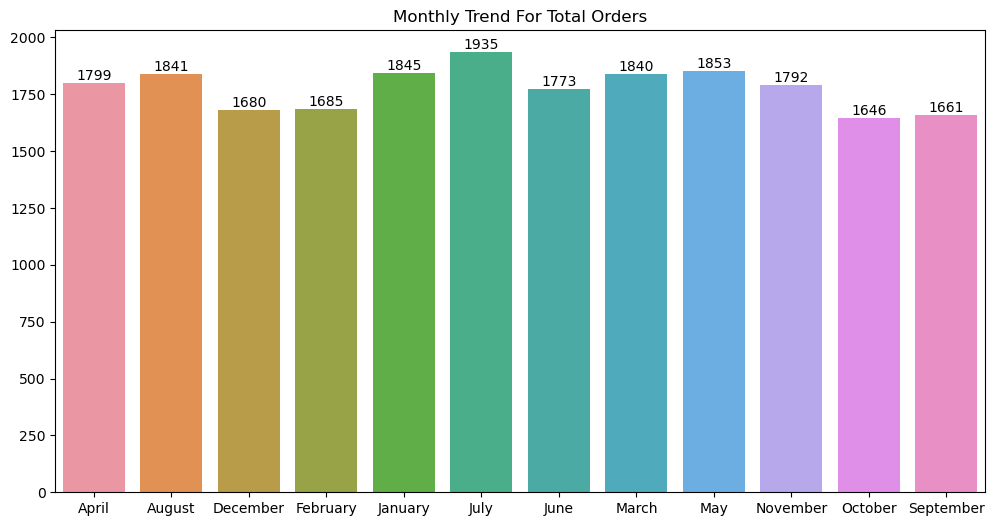

In [49]:
# Monthly Trend For Total Orders.

plt.figure(figsize=(12,6))
ax=sns.barplot(x='month_name',y='order_id',data=b)
plt.title('Monthly Trend For Total Orders')
ax.bar_label(ax.containers[0], fmt='%g')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

## Percentage Of Sales by Pizza Category - 

In [27]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,month_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,January


In [28]:
df.groupby('pizza_category')['total_price'].sum()

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

In [29]:
x=df.groupby('pizza_category')['total_price'].sum().index
y=df.groupby('pizza_category')['total_price'].sum().values

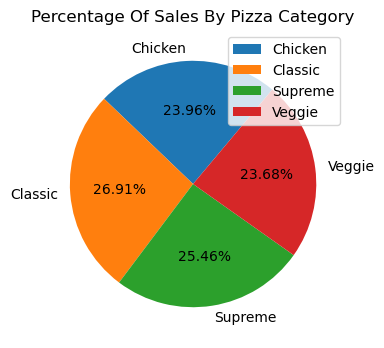

In [30]:
# Now we will display it by pie chart.
# Percentage Of Sales By Pizza Category.

plt.figure(figsize=(5,4))
plt.pie(y,labels = x, startangle = 50,autopct='%0.2f%%')         
plt.title('Percentage Of Sales By Pizza Category')
plt.legend(loc=1)
plt.show()

## Percentage Of Sales By Pizza Size - 

In [31]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,month_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,January


In [32]:
df.groupby('pizza_size')['total_price'].sum()

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

In [33]:
x=df.groupby('pizza_size')['total_price'].sum().index
y=df.groupby('pizza_size')['total_price'].sum().values

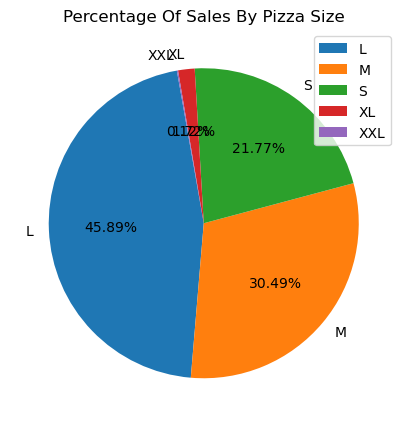

In [34]:
# Plotting a pie chart
# Percentage Of Sales By Pizza Size

plt.figure(figsize=(5,10))
plt.pie(y,labels = x, startangle = 100,autopct='%0.2f%%')         
plt.title('Percentage Of Sales By Pizza Size')
plt.legend(loc=1)
plt.show()

## Total Pizzas Sold By Pizza Category - 

In [35]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_name,month_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,January


In [36]:
df.groupby('pizza_category')['quantity'].sum()

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

In [37]:
z = df.groupby('pizza_category')['quantity'].sum().reset_index()

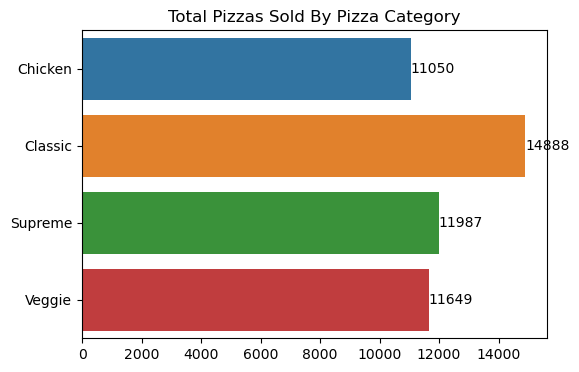

In [38]:
# Plotting horizontal bar chart.
# Total Pizzas Sold By Pizza Category.

plt.figure(figsize=(6,4))
ax = sns.barplot(orient='h',x='quantity',y='pizza_category',data=z)
ax.bar_label(ax.containers[0], fmt='%g')      # To add datalabels on the bars 
ax.set(xlabel=None)    # To remove x axis label
ax.set(ylabel=None)    # To remove y axis label
plt.title('Total Pizzas Sold By Pizza Category')
plt.show()